# Telco Customer Churn Prediction

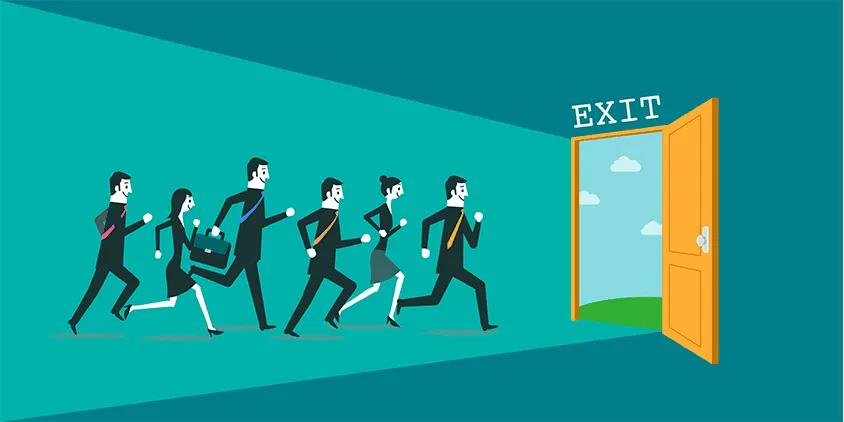

## Problem Statement

### Introduction

#### What is Customer Churn?
Customer churn is the percentage of customers that stopped using company's product or service during a certain time frame. Customer churn is one of the most important metrics for a growing business to evaluate as it is much less expensive to retain existing customers than it is to acquire new customers. Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Customer churn is extremley costly for companies. Based on a churn rate just under two percent for top companies, one source estimates carriers lose $65 million per month from churn. To reduce customer churn, telecom companies should predict which customers are highly prone to churn.

Individualized customer retention is demanding because most companies have a large number of customers and cannot afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could concentrate customer retention efforts only on these "high risk" clients.

###  Obejctives

In this projects below questions will be answered:

What's the % of Customers Churn and customers that keep in with the active services?

Is there any patterns in Customers Churn based on the gender?

Is there any patterns/preference in Customers Churn based on the type of service provided?

What's the most profitable service types?

Which features and services are most profitable?

Which features have the most impact on predicting customers churn?

Which model is the best for predicting churn?


### Dataset Features

Customer ID: A unique ID that identifies each customer.

gender: Whether the customer is a male or a female

SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)

Partner: Whether the customer has a partner or not (Yes, No)

Dependents: Whether the customer has dependents or not (Yes, No)

PhoneService: Whether the customer has a phone service or not (Yes, No)

MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)

InternetService: Customer’s internet service provider (DSL, Fiber optic, No)

OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)

OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)

DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)

TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)

StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)

StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)

tenure: Number of months the customer has stayed with the company

Contract: The contract term of the customer (Month-to-month, One year, Two year)

PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)

PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: The amount charged to the customer monthly

TotalCharges: The total amount charged to the customer

Churn: Target, Whether the customer has left within the last month or not (Yes or No)

## Import Libraries and Data

In [ ]:
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

# balance data
from imblearn.over_sampling import SMOTE

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


# evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score,auc,f1_score,precision_score, recall_score
from sklearn.model_selection import KFold, RandomizedSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/TelcoCustomerChurn.csv')

## Data Reading

In [ ]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
data.shape

(7043, 21)

### Datasets Information

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Summary Statistics

In [ ]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.describe(include=object).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


## Data Visualization

### Churn Frequency

Text(0.5, 1.0, '% of Churning')

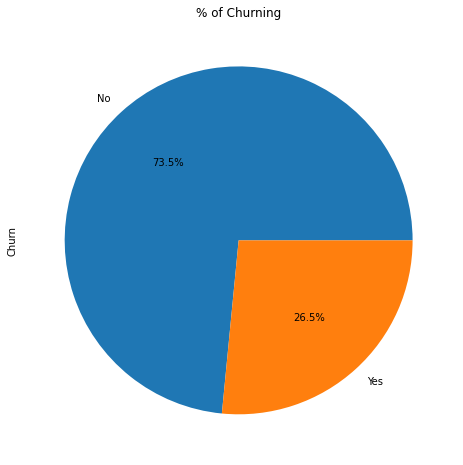

In [ ]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Churning")

We have imbalanced data.

26.5%  of customers switched to another company.

### Gender and Churn Distribuions

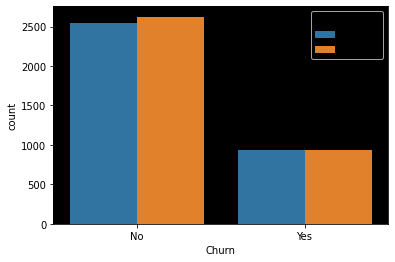

In [ ]:
sns.countplot("Churn", data=data,hue="gender")

In [ ]:
print(f'A female customer has a probability of {round(data[(data["gender"] == "Female") & (data["Churn"] == "Yes")].count()[0] / data[(data["gender"] == "Female")].count()[0] *100,2)} % churn')

print(f'A male customer has a probability of {round(data[(data["gender"] == "Male") & (data["Churn"] == "Yes")].count()[0] / data[(data["gender"] == "Male")].count()[0]*100,2)} % churn')

A female customer has a probability of 26.92 % churn
A male customer has a probability of 26.16 % churn


There is negligible difference in customer percentage who changed the service provider. Both genders behaved in similar way when it comes to migrating to another service provider.

### Customer Contract Distribution w.r.t Churn

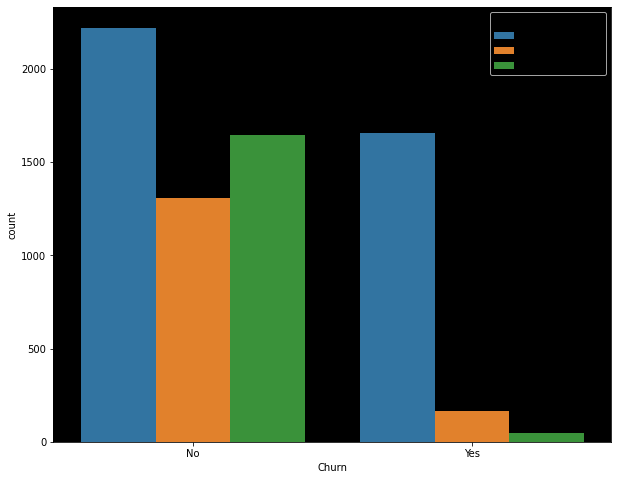

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue="Contract")

In [ ]:
print(f'A customer with month-to-month contract has a probability of {round(data[(data["Contract"] == "Month-to-month") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "Month-to-month")].count()[0] *100,2)} % churn')

print(f'A customer with one year contract has a probability of {round(data[(data["Contract"] == "One year") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "One year")].count()[0]*100,2)} % churn')

print(f'A customer with two year contract has a probability of {round(data[(data["Contract"] == "Two year") & (data["Churn"] == "Yes")].count()[0] / data[(data["Contract"] == "Two year")].count()[0]*100,2)} % churn')

A customer with month-to-month contract has a probability of 42.71 % churn
A customer with one year contract has a probability of 11.27 % churn
A customer with two year contract has a probability of 2.83 % churn


About 43% of customer with Month-to-Month Contract opted to move out as compared to 11% of customrs with One Year Contract and 3% with Two Year Contract. A major percent of people who left the comapny had Month-to-Month Contract.

### Payment Method Distribution w.r.t Churn

Text(0.5, 1.0, '% of Payment Method')

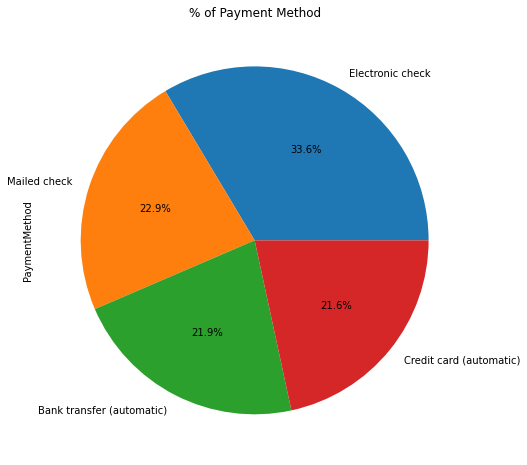

In [ ]:
data['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Payment Method")

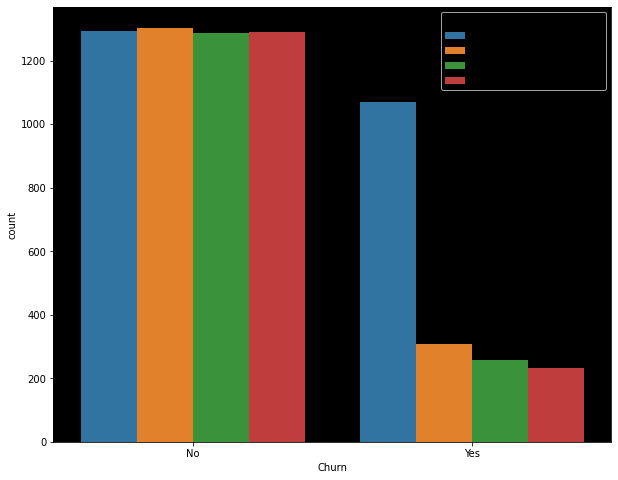

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue="PaymentMethod")

Major customers who moved out had Electronic Check as Payment Method.

Customers who chose Credit-Card automatic transfer or Bank Automatic Transfer and Mailed Check as Payment Method were less likely to move out.

### Churn Distribution w.r.t Internet Service

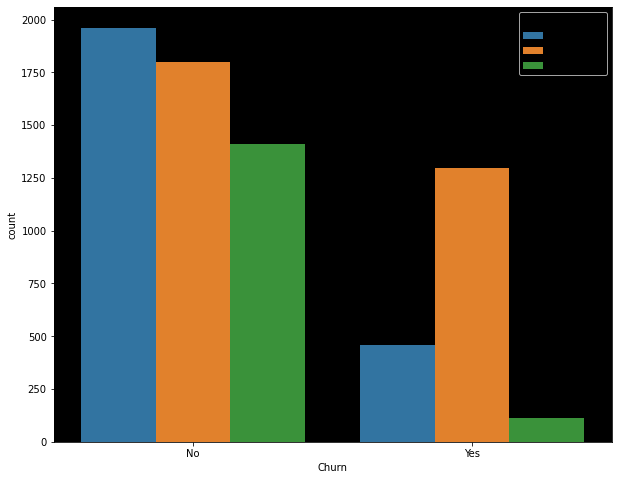

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("InternetService"))

A lot of customers choose the Fiber optic service and it's also evident that the customers who use Fiber optic have high churn rate, this might suggest a dissatisfaction with this type of internet service.

Customers having DSL service are majority in number and have less churn rate compared to Fibre optic service.

### Dependents Distribution

Text(0.5, 1.0, '% of Dependents')

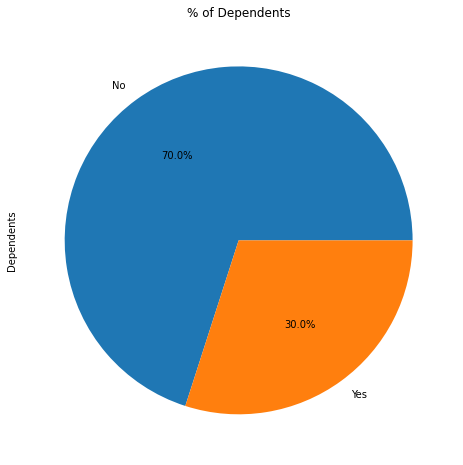

In [ ]:
data['Dependents'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Dependents")

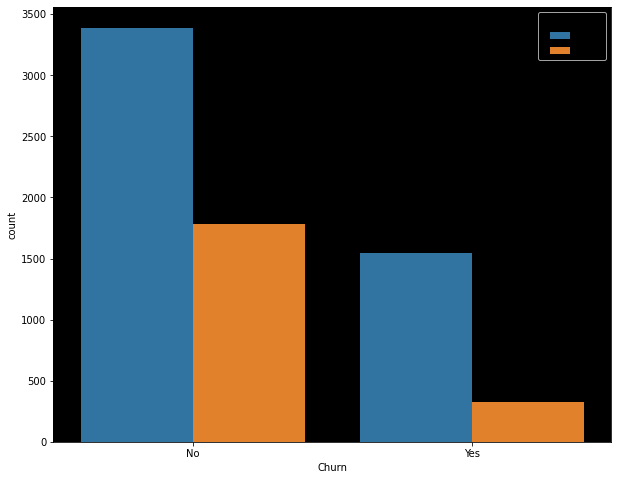

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("Dependents"))

Customers without dependents are more likely to churn.

### Partner Distribution

Text(0.5, 1.0, '% of Partner')

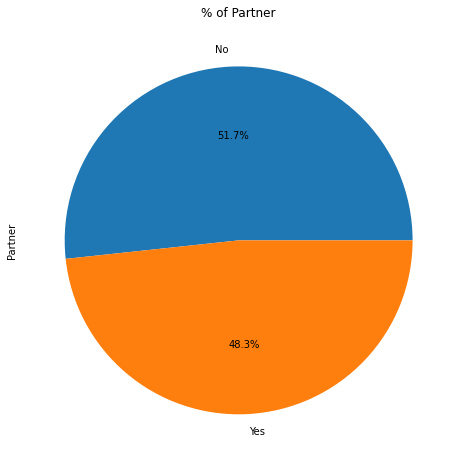

In [ ]:
data['Partner'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Partner")

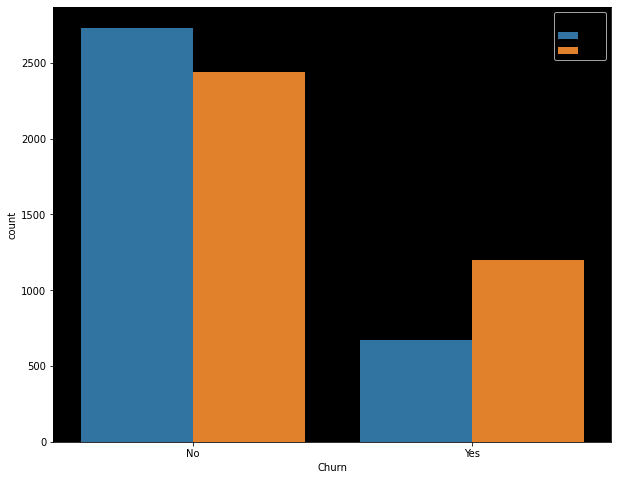

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("Partner"))

Customers that doesn't have partners are more likely to churn.

### Senior Citizen Distributionh

Text(0.5, 1.0, '% of Senior Citizen')

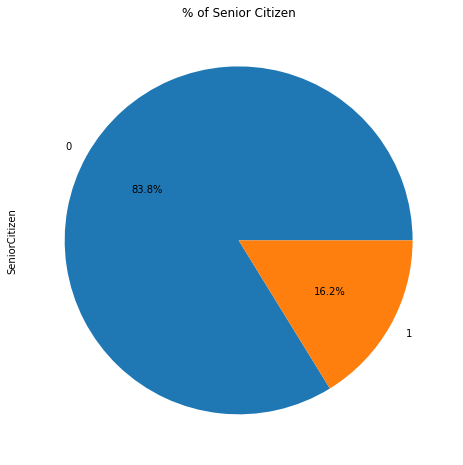

In [ ]:
data['SeniorCitizen'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of Senior Citizen")

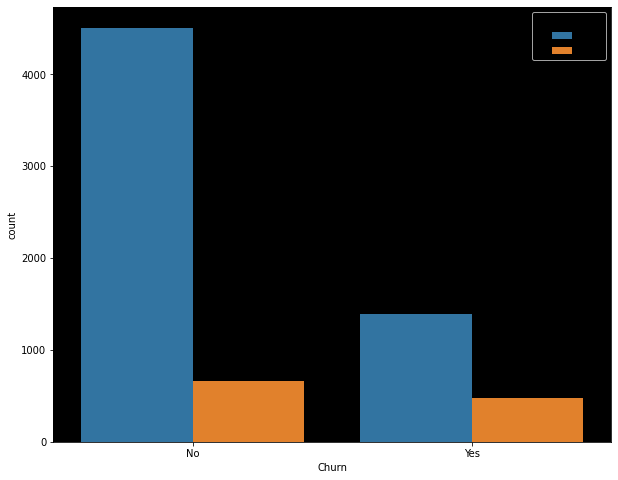

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("SeniorCitizen"))

It can be observed that the there are vey few senior citizens who churns.

### TechSupport Distribution

Text(0.5, 1.0, '% of TechSupport')

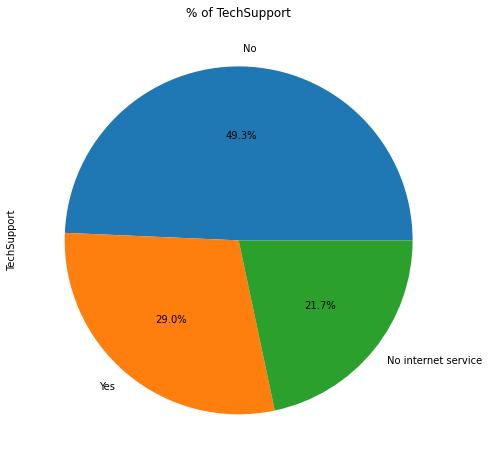

In [ ]:
data['TechSupport'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of TechSupport")

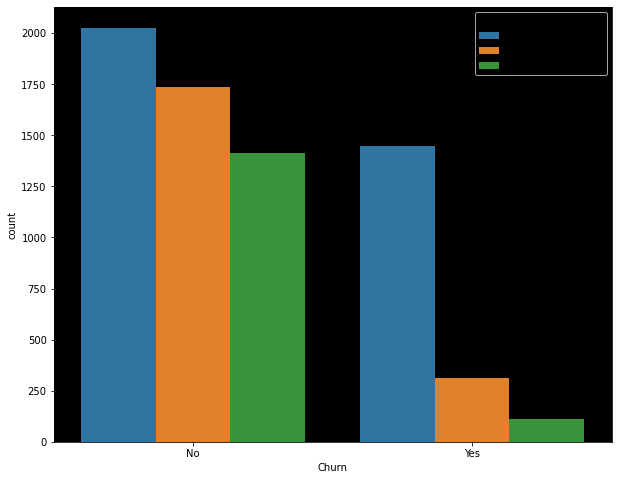

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("TechSupport"))

Customers with no TechSupport are most likely to migrate to another service provider.

### Phone Service Distribution

Text(0.5, 1.0, '% of PhoneService')

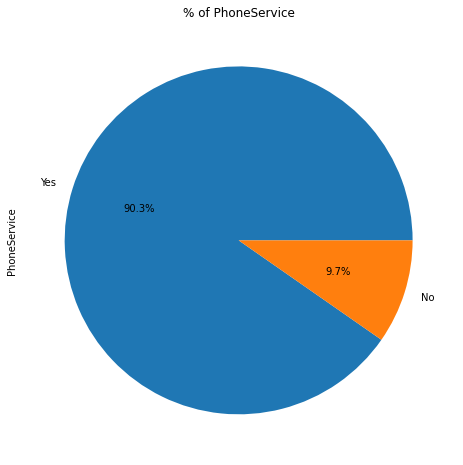

In [ ]:
data['PhoneService'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));
plt.title("% of PhoneService")

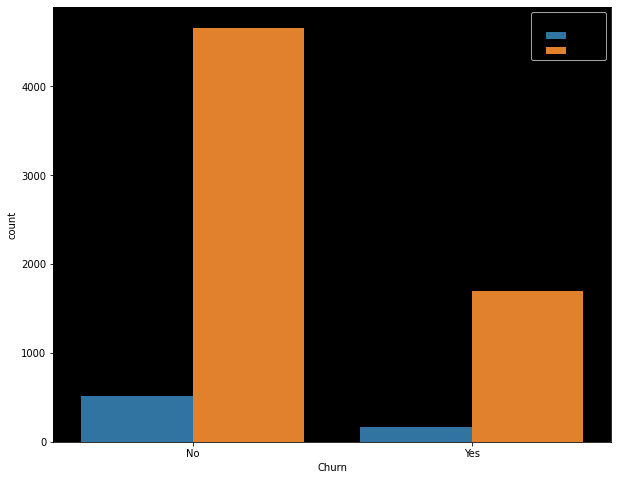

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data,hue=("PhoneService"))

Very small fraction of customers don't have a phone service.

We can now observe that the column TotalCharges has 11 missing values.

## Outlier Detection

The presence of outliers in a classification or regression dataset can result in a poor fit and lower predictive modeling performance, therefore we should see there are ouliers in the data.

In [ ]:
data=data.drop(labels=['customerID'],axis=1)

In [ ]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [ ]:
num_data=data.select_dtypes(include=['float64','int64']).columns

In [ ]:
num_data=num_data.drop('SeniorCitizen')

Text(0.5, 0.98, 'Box Plot of continuous variables')

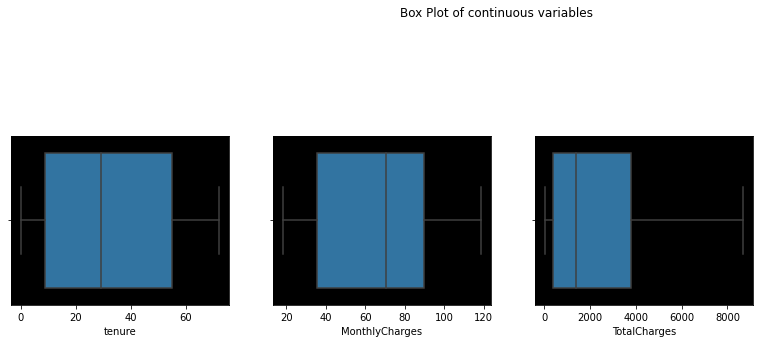

In [ ]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(num_data):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,4, i+1)
    sns.boxplot(data=data, x=col)
plt.suptitle('Box Plot of continuous variables')


There is no outlier.

## Missing value Detection

In [ ]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We can now observe that the column TotalCharges has 11 missing values.

In [ ]:
# drop observations with null values
data.dropna(inplace=True)

 ## Categorical Variables Encoding   

In [ ]:
data['Churn'] = data['Churn'].map({'Yes':1,'No':0})

We use Target guided ordinal encoding. Ordering the categories according to the target means assigning a number to the category, but this numbering, this ordering, is informed by the mean of the target within the category. Briefly, we calculate the mean of the target for each label/category, then we order the labels according to these mean from smallest to biggest, and we number them accordingly.

In [ ]:
categorical = [var for var in data.columns if data[var].dtype=='O']

In [ ]:
def category(df):
    for var in categorical:
        ordered_labels = df.groupby([var])['Churn'].mean().sort_values().index

        ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
        ordinal_label
        df[var] = df[var].map(ordinal_label)

category(data)

In [ ]:
data.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,1,0,0,1,2,1,2,2,2,2,2,1,3,29.85,29.85,0
1,0,0,1,1,34,1,1,1,1,2,1,2,2,2,1,0,2,56.95,1889.50,0
2,0,0,1,1,2,1,1,1,1,1,2,2,2,2,2,1,2,53.85,108.15,1
3,0,0,1,1,45,0,0,1,1,2,1,1,2,2,1,0,1,42.30,1840.75,0
4,1,0,1,1,2,1,1,2,2,2,2,2,2,2,2,1,3,70.70,151.65,1


## Balance Data

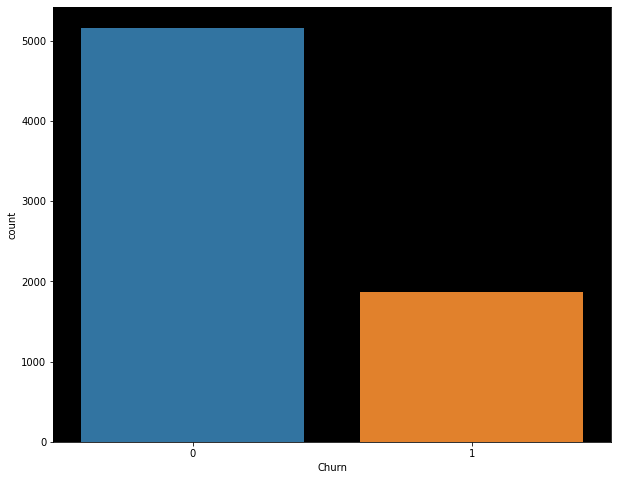

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot("Churn", data=data)

As shown in the plot above, we are dealing with an imbalanced dataset. The SMOTE method is used which oversamples just those difficult instances, providing more resolution only where it may be required.

In [ ]:
x= data.drop(['Churn'], axis = 1)
y = data['Churn']
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [ ]:
x.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

## Dataset Splitting


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape

((8260, 19), (2066, 19))

## Feature Scaling

Data Normalization is transforming numeric columns to a common scale.Some feature values differ from others multiple times. The features with higher values will dominate the learning process .After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

There are multiple normalization techniques in statistics. In this project, i use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale. The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [ ]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = data[column].min()
        # maximum value of the column
        max_column = data[column].max()
        # min max scaler
        data[column] = (data[column] - min_column) / (max_column - min_column)

In [ ]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,1,0.000000,0,0,1,2,1,2,2,2,2,2,1,3,0.115423,0.001275,0
1,0,0,1,1,0.464789,1,1,1,1,2,1,2,2,2,1,0,2,0.385075,0.215867,0
2,0,0,1,1,0.014085,1,1,1,1,1,2,2,2,2,2,1,2,0.354229,0.010310,1
3,0,0,1,1,0.619718,0,0,1,1,2,1,1,2,2,1,0,1,0.239303,0.210241,0
4,1,0,1,1,0.014085,1,1,2,2,2,2,2,2,2,2,1,3,0.521891,0.015330,1


## Modeling and Parameter Optimization

In [ ]:
###Checking the Scores

def check_scores(model, x_train, x_test):
  # Making predictions on train and test data

  train_class_preds = model.predict(x_train)
  test_class_preds = model.predict(x_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(x_train)[:,1]
  test_preds = model.predict_proba(x_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(y_train,train_class_preds)
  test_accuracy = accuracy_score(y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
    
   # Get the confusion matrices for train and test
  train_cm = confusion_matrix(y_train,train_class_preds)
  test_cm = confusion_matrix(y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(y_train,train_preds)
  test_auc = roc_auc_score(y_test,test_preds)

  print('AUC on train data:', train_auc)
  print('AUC on test data:', test_auc)
  
  # Fscore, precision and recall on test data
  f1 = f1_score(y_test, test_class_preds)
  precision = precision_score(y_test, test_class_preds)
  recall = recall_score(y_test, test_class_preds)
  print("F1 score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)


  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall

In [ ]:
CV = KFold(n_splits=10, random_state=0, shuffle=True)

### Model 1 : LR

In [ ]:
LR_S = LogisticRegression(random_state = 42)
params_LR = {'C': list(np.arange(1,12)), 'penalty': ['l1', 'l2', 'elasticnet', 'none'] , 'class_weight': ['balanced','None']}
randomsearch= RandomizedSearchCV(LR_S, param_distributions=params_LR, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
randomsearch.fit(x_train, y_train)
print('Best parameters:',randomsearch.best_estimator_)

Best parameters: LogisticRegression(C=5, class_weight='balanced', random_state=42)


In [ ]:
lr_optimal_model= LogisticRegression(random_state = 42, penalty= 'l2', class_weight= 'None', C=6)
lr_optimal_model.fit(x_train, y_train)

LogisticRegression(C=6, class_weight='None', random_state=42)

#### Getting Score

In [ ]:
lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall= check_scores(lr_optimal_model,x_train,x_test)

The accuracy on train dataset is 0.7621065375302664
The accuracy on test dataset is 0.7570183930300097

Train confusion matrix:
[[3047 1079]
 [ 886 3248]]

Test confusion matrix:
[[772 265]
 [237 792]]

AUC on train data: 0.8519513001319584
AUC on test data: 0.837766019756849
F1 score is: 0.7593480345158198
Precision is: 0.7492904446546831
Recall is: 0.7696793002915452


### Model 2: Random Forest

In [ ]:
RF_S = RandomForestClassifier(random_state = 42)
params_RF = {'n_estimators': list(range(50,100)), 'min_samples_leaf': list(range(1,5)), 'min_samples_split': list(range(1,5))}
grid_RF = RandomizedSearchCV(RF_S, param_distributions=params_RF, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_RF.fit(x_train, y_train)
print('Best parameters:', grid_RF.best_estimator_)

Best parameters: RandomForestClassifier(n_estimators=66, random_state=42)


In [ ]:
rf_optimal_model= RandomForestClassifier(min_samples_leaf=2, min_samples_split=4, n_estimators=95,random_state=42)
rf_optimal_model.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=2, min_samples_split=4, n_estimators=95,
                       random_state=42)

#### Getting Score

In [ ]:
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall= check_scores(rf_optimal_model,x_train,x_test)

The accuracy on train dataset is 0.9606537530266344
The accuracy on test dataset is 0.8209099709583737

Train confusion matrix:
[[3914  212]
 [ 113 4021]]

Test confusion matrix:
[[825 212]
 [158 871]]

AUC on train data: 0.9953396235795472
AUC on test data: 0.9028927730342724
F1 score is: 0.8248106060606061
Precision is: 0.804247460757156
Recall is: 0.8464528668610302


### Model 3: KNN

In [ ]:
KNN_S = KNeighborsClassifier()
params_KNN = {'n_neighbors': list(range(1,20))}
grid_KNN = RandomizedSearchCV(KNN_S, param_distributions=params_KNN, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_KNN.fit(x_train, y_train)
print('Best parameters:', grid_KNN.best_estimator_)

Best parameters: KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn_optimal_model=KNeighborsClassifier(n_neighbors=1)
knn_optimal_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model, knn_train_auc, knn_test_auc, knn_train_accuracy, knn_test_accuracy,knn_f1, knn_precision,knn_recall= check_scores(knn_optimal_model,x_train,x_test)

The accuracy on train dataset is 0.998910411622276
The accuracy on test dataset is 0.7860600193610843

Train confusion matrix:
[[4120    6]
 [   3 4131]]

Test confusion matrix:
[[763 274]
 [168 861]]

AUC on train data: 0.9989100588360688
AUC on test data: 0.7862554858008778
F1 score is: 0.7957486136783734
Precision is: 0.758590308370044
Recall is: 0.8367346938775511


### Model 4: Decision Tree

In [ ]:
DT_S = DecisionTreeClassifier(random_state=42)
params_DT = {'min_samples_leaf': list(range(1,6)), 'min_samples_split': list(range(1,6))}
grid_DT = RandomizedSearchCV(DT_S, param_distributions=params_DT, cv=5, n_jobs=-1, n_iter=20, random_state=42, return_train_score=True)
grid_DT.fit(x_train, y_train)
print('Best parameters:', grid_DT.best_estimator_)

Best parameters: DecisionTreeClassifier(min_samples_leaf=4, random_state=42)


In [ ]:
DT_optimal_model= DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
DT_optimal_model.fit(x_train,y_train)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

#### Getiing Score

In [ ]:
DT_model, DT_train_auc, DT_test_auc, DT_train_accuracy, DT_test_accuracy,DT_f1, DT_precision,DT_recall= check_scores(DT_optimal_model,x_train,x_test)

The accuracy on train dataset is 0.912590799031477
The accuracy on test dataset is 0.7647628267182962

Train confusion matrix:
[[3840  286]
 [ 436 3698]]

Test confusion matrix:
[[810 227]
 [259 770]]

AUC on train data: 0.9803787139550224
AUC on test data: 0.8248957662690369
F1 score is: 0.7601184600197434
Precision is: 0.7723169508525577
Recall is: 0.7482993197278912


### Model 5:Max Voting Classifier Model

In [ ]:
# Appending all the models to estimators list
estimators = []

estimators.append(('logistic', lr_optimal_model))
estimators.append(('randomforest', rf_optimal_model))
estimators.append(('KNN', knn_optimal_model))
estimators.append(('DT', DT_optimal_model))

# create the voting model
voting_model = VotingClassifier(estimators, voting='soft')

voting_model.fit(x_train, y_train)

VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=6, class_weight='None',
                                                 random_state=42)),
                             ('randomforest',
                              RandomForestClassifier(min_samples_leaf=2,
                                                     min_samples_split=4,
                                                     n_estimators=95,
                                                     random_state=42)),
                             ('KNN', KNeighborsClassifier(n_neighbors=1)),
                             ('DT',
                              DecisionTreeClassifier(min_samples_leaf=4,
                                                     random_state=42))],
                 voting='soft')

#### Getting Score

In [ ]:
#Getting all the scores and errors
voting_model, voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_f1, voting_precision, voting_recall=check_scores(voting_model,x_train,x_test)

The accuracy on train dataset is 0.9869249394673123
The accuracy on test dataset is 0.8180058083252663

Train confusion matrix:
[[4060   66]
 [  42 4092]]

Test confusion matrix:
[[809 228]
 [148 881]]

AUC on train data: 0.9992266758688163
AUC on test data: 0.8971696406899996
F1 score is: 0.8241347053320861
Precision is: 0.7944093778178539
Recall is: 0.8561710398445093


## Feature Importance

What features contribute more to predict the target (Churn)? let's find out how useful they are at predicting the target variable.

Random Forest algorithm offer importance scores based on the reduction in the criterion used to select split points, like Gini or entropy.

In [ ]:
d = {'Features': x_train.columns, 'Feature Importance': rf_optimal_model.feature_importances_}
df = pd.DataFrame(d)
df_sorted = df.sort_values(by='Feature Importance', ascending = True)
df_sorted
df_sorted.style.background_gradient(cmap='Blues')

,Features,Feature Importance
5,PhoneService,0.009773
1,SeniorCitizen,0.011794
3,Dependents,0.014187
15,PaperlessBilling,0.017084
2,Partner,0.019027
6,MultipleLines,0.020705
10,DeviceProtection,0.022400
9,OnlineBackup,0.025742
0,gender,0.027877
12,StreamingTV,0.031583


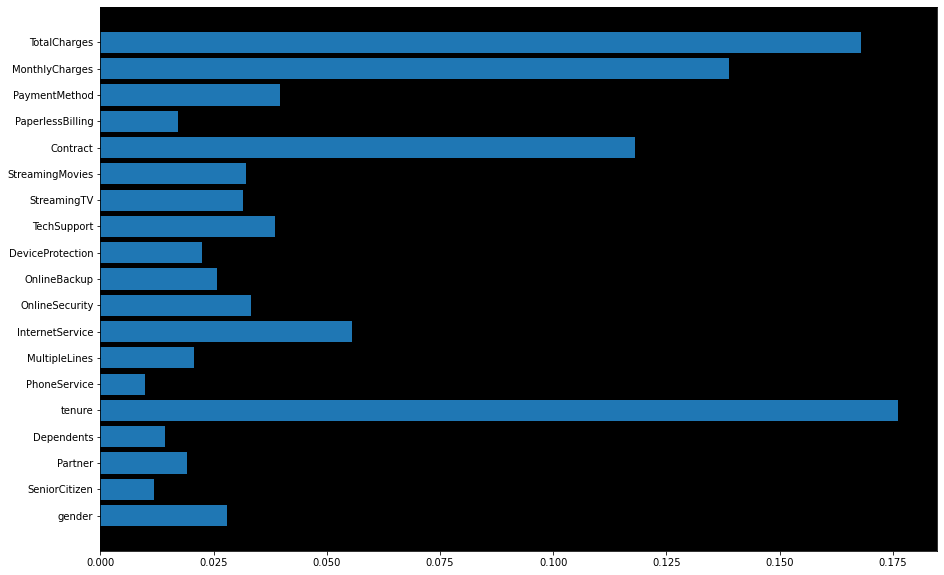

In [ ]:
fig = plt.figure(figsize =(15, 10))
Feature= df['Features']
Feature_Importance= df['Feature Importance']
plt.barh(Feature,Feature_Importance)
 
# Show Plot
plt.show()

## Result

In [ ]:
 #Making a dataframe of all the scores for every model
scores_ = [("Random Forest", rf_train_accuracy, rf_test_accuracy,rf_test_auc),
("Decision Tree",DT_train_accuracy,DT_test_accuracy,DT_test_auc),
("Logistic Regression", lr_train_accuracy, lr_test_accuracy,lr_test_auc),
('K Nearest Neighbour',knn_train_accuracy,knn_test_accuracy,knn_test_auc),
("Voting Classifier", voting_train_accuracy, voting_test_accuracy,voting_test_auc)]
Scores_ =pd.DataFrame(data = scores_, columns=['Model Name','Train Accuracy','Test Accuracy','Test Auc Score'])
Scores_.set_index('Model Name', inplace = True)



In [ ]:
Scores_.style.background_gradient(cmap='YlGn')

,Train Accuracy,Test Accuracy,Test Auc Score
Model Name,,,
Random Forest,0.960654,0.820910,0.902893
Decision Tree,0.912591,0.764763,0.824896
Logistic Regression,0.762107,0.757018,0.837766
K Nearest Neighbour,0.998910,0.786060,0.786255
Voting Classifier,0.986925,0.818006,0.897170


##  Conclusion

Here is a summary of our findings:

Customers with fiber optic service as home Internet, are more likely to churn.

People with Device protection plan can be considered as low risk.

Customers who have been with the company longer are on average paying more every month and are less likely to churn.

As we see above the Hyperparameter tunning using Randomizedsearch of Random Forest outperforms all the other models in terms of accuracy